In [1]:
import pandas as pd 
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nltk
from nltk.corpus import brown
from nltk import word_tokenize
import scipy.stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
from sklearn import svm
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [121]:
'''
#df_nolabel = pd.read_csv("bof_training_db_withoutlabel.csv", sep=',')
df_train1000 = pd.read_csv("bof_training_db_1000label.csv", sep=',')
#df_withlabel = pd.read_csv("bof_training_db_withlabel.csv", sep=',')
df_test5561 = pd.read_csv("bof_training_testdb_1000label.csv", sep=',')
'''

In [104]:
'''
#df_nolabel.drop(['Unnamed: 0'], axis=1)
traindb = df_train1000.drop(['Unnamed: 0'], axis=1)
testdb = df_test5561.drop(['Unnamed: 0'], axis=1)
'''

In [791]:
df_18 = pd.read_csv("bof_training_db_manuallabel.csv", sep=',')

3

In [3]:
df_train1000 = pd.read_csv("bof_training_db_manuallabel.csv", sep=',')
df_train1000 = df_train1000.drop(['Unnamed: 0'], axis=1)

In [4]:
#load unlabeled data
df_unlabel = pd.read_csv("bof_training_db_withlabel.csv", sep=',')
df_unlabel = df_unlabel.drop(['Unnamed: 0'], axis=1)
for row_numb in range(len(df_unlabel)):
    if (df_unlabel.loc[row_numb,'label']) == 0:
        df_unlabel.loc[row_numb,'label'] = -1

In [6]:
#delete manuallabel from test set
test = df_unlabel.append(df_train1000)
test = test.drop(['manual_label'], axis=1)
test = test.drop_duplicates(keep=False)

In [7]:
df_train1000.iloc[16].sub_content

' portland, united states -- alongside sneakers, gym shorts, and yoga pants, sportswear brands are adding one more must-have to their list of products: workout apps.unlike nike inc., which has been developing its own running and sports apps for years, rivals have taken to acquiring startups to stay relevant among gym rats who want to quantify their every step, jump, and calorie burned. Adidas, Asics, Under Armour Spend $1 Billion on Fitness Apps. "the fitness brands have been aspiring to have a relationship with the consumers early and establish an ongoing relationship with consumers," he said. that strategy can build more loyalty with customers, and buying an established app offers clothing and footwear companies a quicker way onto the market than building from scratch. "people want to be connected, track their stats, update their records," said roger entner, a technology analyst at recon analytics. "runners will be more loyal to the shoe brand if it also has all your stats. imagine t

In [8]:
test['label'].value_counts()

 1.0    5990
-1.0    1263
Name: label, dtype: int64

In [9]:
#change 0 maunal_label to -1 
for row_numb in range(len(df_train1000)):
    if (df_train1000.loc[row_numb,'manual_label']) == 0:
        df_train1000.loc[row_numb,'manual_label'] = -1

In [10]:
traindb = df_train1000

In [11]:
traindb.head()

,id,summary,title,tags,sub_content,content,content_score,summary_score,sum_score,label,manual_label
0,64167,the savigny luxury index lost ground in octobe...,Market Pulse | Big Shoes to Fill,prada,will privately-held chanel become the leading ...,"london, united kingdom -- exceptionally, the ...",0.750000,0.35,0.630000,1,1
1,342685,lvmh is considering a change of creative direc...,Update: Louis Vuitton Denies Report of Nicolas...,lvmh,"update: speaking to bof, a spokesperson for l...","update: speaking to bof, a spokesperson for l...",0.666667,0.50,0.616667,1,1
2,205004,nike inc. reported a 4.1 percent rise in quart...,Nike Sales Rise 4.1 Percent as Demand Jumps in...,beaverton,"beaverton, united states -- nike inc, the wor...","beaverton, united states -- nike inc, the wor...",0.566667,0.60,0.576667,1,1
3,98996,bof speaks to swiss fashion photographer hans ...,Hans Feurer: 'Behind Fashion There Is Always a...,france,"paris, france -- ""i love women.i have a lot o...","paris, france -- ""i love women. i have a lot ...",0.500000,0.70,0.560000,1,-1
4,181181,inditex sa reported first-half profit that mat...,Inditex First-Half Profit Rises on Zara Owner’...,madrid,"madrid, spain -- inditex sa, the world's larg...","madrid, spain -- inditex sa, the world's larg...",0.550000,0.50,0.535000,1,1


# preprocessing

In [12]:
traindb = traindb.drop(['id','content','title'], axis=1)
#testdb = testdb.drop(['id','content','sub_content','summary','title'], axis=1)

In [13]:
test = test.drop(['id','content','title'], axis=1)
#tag one-hot-code
#df_temp = pd.get_dummies(traindb['tags'],prefix='tags', drop_first=True)
#traindb = traindb.join(df_temp)
#traindb = traindb.drop(['tags'], axis=1)

In [14]:
#split train and validation set
y = traindb['manual_label']
X = traindb.drop(['manual_label'], axis=1)
X_train, X_validation, y_train, y_validation = train_test_split(
X, y, test_size=0.17, random_state=42)

In [15]:
y_validation.value_counts()

 1    96
-1    73
Name: manual_label, dtype: int64

In [16]:
y_validation = pd.DataFrame(data=y_validation, columns=['manual_label'] )

In [17]:
y_train = pd.DataFrame(data=y_train, columns=['manual_label'] )

In [17]:
'''
def Sentencetoken(corpus):
    traindb.iloc[0].sub_content.split()

from nltk.tokenize import sent_tokenize
temp_sentence = sent_tokenize(traindb.loc[4,'sub_content'])
x = traindb.loc[16,'sub_content']
text="this's a sent tokenize test. this is sent two. is this sent three?" 
temp_sentence = sent_tokenize(x)
temp_sentence
'''

'\ndef Sentencetoken(corpus):\n    traindb.iloc[0].sub_content.split()\n\nfrom nltk.tokenize import sent_tokenize\ntemp_sentence = sent_tokenize(traindb.loc[4,\'sub_content\'])\nx = traindb.loc[16,\'sub_content\']\ntext="this\'s a sent tokenize test. this is sent two. is this sent three?" \ntemp_sentence = sent_tokenize(x)\ntemp_sentence\n'

In [18]:
len(X_train)

823

# word2vec

In [19]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def content_to_wordlist( content, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    content_text = BeautifulSoup(content, 'lxml').get_text()
    #  
    # 2. Remove non-letters
    content_text = re.sub("[^a-zA-Z]"," ", content_text)
    #
    # 3. Convert words to lower case and split them
    words = content_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [20]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
#nltk.download()   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a content into parsed sentences
def content_to_sentences( content, tokenizer, remove_stopwords=False ):
    # Function to split a content into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(content.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call contentreview_to_wordlist to get a list of words
            sentences.append( content_to_wordlist( raw_sentence, 
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [21]:
sentences = []  # Initialize an empty list of sentences

print ("Parsing sentences from training set")
for content in X_train["sub_content"]:
    sentences += content_to_sentences(content, tokenizer)

print ("Parsing sentences from validation set")
for content in X_validation["sub_content"]:
    sentences += content_to_sentences(content, tokenizer)
    
print ("Parsing sentences from unlabeled set")
for content in test["sub_content"]:
    sentences += content_to_sentences(content, tokenizer)

Parsing sentences from training set
Parsing sentences from validation set
Parsing sentences from unlabeled set


In [22]:
print(len(test))

7253


In [100]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 100    # Word vector dimensionality                      
min_word_count = 3   # Minimum word count                        
#num_workers = 4       # Number of threads to run in parallel
context = 4          # Context window size                                                                                    
#downsampling = 1e-3   # Downsample setting for frequent words
#model = word2vec.Word2Vec(sentences, workers=num_workers, 
            #size=num_features, min_count = min_word_count, 
            #window = context, sample = downsampling)

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sentences,  
            size=num_features, min_count = min_word_count, 
            window = context)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
#model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "100features_3minwords_4context_25445sentences"
model.save(model_name)

2018-07-30 00:52:14,775 : INFO : collecting all words and their counts
2018-07-30 00:52:14,778 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-30 00:52:14,868 : INFO : PROGRESS: at sentence #10000, processed 459859 words, keeping 18645 word types


Training model...


2018-07-30 00:52:15,010 : INFO : PROGRESS: at sentence #20000, processed 1292474 words, keeping 27310 word types
2018-07-30 00:52:15,076 : INFO : collected 29431 word types from a corpus of 1632287 raw words and 25445 sentences
2018-07-30 00:52:15,077 : INFO : Loading a fresh vocabulary
2018-07-30 00:52:15,201 : INFO : effective_min_count=3 retains 18675 unique words (63% of original 29431, drops 10756)
2018-07-30 00:52:15,203 : INFO : effective_min_count=3 leaves 1617754 word corpus (99% of original 1632287, drops 14533)
2018-07-30 00:52:15,250 : INFO : deleting the raw counts dictionary of 29431 items
2018-07-30 00:52:15,252 : INFO : sample=0.001 downsamples 39 most-common words
2018-07-30 00:52:15,253 : INFO : downsampling leaves estimated 1277764 word corpus (79.0% of prior 1617754)
2018-07-30 00:52:15,302 : INFO : estimated required memory for 18675 words and 100 dimensions: 24277500 bytes
2018-07-30 00:52:15,303 : INFO : resetting layer weights
2018-07-30 00:52:15,478 : INFO : tr

In [102]:
model.wv.doesnt_match("man woman child kitchen".split())
'kitchen'

'kitchen'

In [103]:
model.wv.most_similar("lvmh")

[('kering', 0.810712993144989),
 ('hermes', 0.7154947519302368),
 ('richemont', 0.6441426277160645),
 ('ppr', 0.6430332064628601),
 ('louisvuitton', 0.6088076233863831),
 ('gucci', 0.5685011148452759),
 ('conglomerate', 0.5540012121200562),
 ('zenith', 0.538640558719635),
 ('bulgari', 0.537268877029419),
 ('majority', 0.5369027853012085)]

In [23]:
#load model
from gensim.models import Word2Vec
model = Word2Vec.load("100features_3minwords_4context_25445sentences")

In [ ]:
#Vector averaging

In [24]:
import numpy as np  

def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given paragraph
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0.
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.index2word)
    #
    # Loop over each word in the content and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
            
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(contents, model, num_features):
    # Given a set of contents (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0.
    # 
    # Preallocate a 2D numpy array, for speed
    contentFeatureVecs = np.zeros((len(contents),num_features),dtype="float32")
    # 
    # Loop through the contents
    for content in contents:
       #
       # Print a status message every 1000th content
        if counter%1000. == 0.:
            print ("content %d of %d" % (counter, len(contents)))
        
        counter = int(counter)
       # Call the function (defined above) that makes average feature vectors
        contentFeatureVecs[counter] = makeFeatureVec(content, model, 
            num_features)
       #
       # Increment the counter
        counter = counter + 1
    return contentFeatureVecs

In [22]:
num_features = 100

In [23]:
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.

clean_train_contents = []
for content in X_train["sub_content"]:
    clean_train_contents.append( content_to_wordlist( content, 
        remove_stopwords=True ))

trainDataVecs = getAvgFeatureVecs( clean_train_contents, model, num_features)

print ("Creating average feature vecs for test contents")
clean_test_contents = []
for content in X_validation["sub_content"]:
    clean_test_contents.append( content_to_wordlist( content, 
        remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_contents, model, num_features )

content 0 of 823
Creating average feature vecs for test contents
content 0 of 169


In [83]:
len(trainDataVecs[0])

100

In [52]:
#X_train.dtypes

In [145]:
len(scaletrainVecs[0])

300

In [24]:
#scale 
from sklearn.preprocessing import scale

scaletrainVecs = trainDataVecs
scaletrainVecs = scale(scaletrainVecs)
scaletestVecs = testDataVecs
scaletestVecs = scale(scaletestVecs)

/Users/bonnieliu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/bonnieliu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


# model factory

In [73]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [47]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

forest = RandomForestClassifier( n_estimators = 100 )

print ("Fitting a random forest to labeled training data...")
forest = forest.fit( scaletrainVecs, y_train["manual_label"] )

train_pred = forest.predict(scaletrainVecs)
print('train set accuracy:', accuracy_score(y_train,train_pred))
# Test & extract results 
y_pred = forest.predict(scaletestVecs)
print('test set accuracy:',accuracy_score(y_validation,y_pred))
#print(recall_score(y_validation,y_pred))
print(confusion_matrix(y_validation,y_pred))

#create roc curve 
#from sklearn.metrics import roc_curve, auc
#pred_probas = forest.predict_proba(scaletestVecs)
#fpr,tpr,_ = roc_curve(y_validation, pred_probas)
#roc_auc = auc(fpr, tpr)
#plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
#plt.plot([0,1], [0,1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.legend(loc= 'lower right')

#plt.show()

Fitting a random forest to labeled training data...
0.668639053254
[[33  0 24]
 [ 2  2 12]
 [18  0 78]]


In [82]:
# Write the test results 
# output = pd.DataFrame( data={"id":X_validation["id"], "sentiment":result} )output
'''
temppdb = df_train1000
y1 = temppdb['manual_label']
X1 = temppdb.drop(['id','content','title','label'], axis=1)
X1_train, X1_validation, y1_train, y1_validation = train_test_split(
X1, y1, test_size=0.17, random_state=42)
output = X1_validation
output['prediction'] = result
output.to_csv( "Word2Vec_AverageVectors.csv", index=False )
'''

/Users/bonnieliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
output

In [57]:
#XGBoost

#from sklearn import cross_validation, metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=118,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 slient=True)

In [59]:
xgb_param = xgb1.get_xgb_params()
xgtrain = xgb.DMatrix(scaletrainVecs, label=y_train)

        
#Fit the algorithm on the data
xgb1.fit(scaletrainVecs, y_train.values.ravel(),eval_metric='auc')
        
#Predict validation set:
dval_predictions = xgb1.predict(scaletestVecs)
#dval_predprob = xgb1.predict_proba(x_val)[:,1]


#Save model
#joblib.dump(xgb1, 'xgb1.model')
#Print model report:
print ("\n XGBoost Model Report")
print("Accuracy : %.4g" % accuracy_score(y_validation, dval_predictions))



 XGBoost Model Report
Accuracy : 0.6331


# GOOGLE pre-trained vectors

In [25]:
import gensim
from gensim.models import KeyedVectors

In [26]:
model_1 = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True)

In [69]:
# save the model for later use. You can load it later using Word2Vec.load()
model_1_name = "google_100features_3minwords_4context_25445sentences"
model_1.save(model_1_name)

In [82]:
model_1.most_similar(positive=['ate','speak'], negative=['eat'], topn = 5)

[('spoke', 0.6965223550796509),
 ('speaking', 0.626129150390625),
 ('conversed', 0.5754593014717102),
 ('spoken', 0.5704883337020874),
 ('speaks', 0.5630601644515991)]

In [81]:
model_1.most_similar("gucci")

[('prada', 0.6911555528640747),
 ('louis_vuitton', 0.6712427139282227),
 ('burberry', 0.6528220772743225),
 ('versace', 0.6431334614753723),
 ('chanel', 0.6372589468955994),
 ('christian_louboutin', 0.6263206005096436),
 ('nike_shox', 0.6256839036941528),
 ('dior', 0.6157450079917908),
 ('lv', 0.6153838038444519),
 ('gucci_shoes', 0.6137488484382629)]

In [27]:
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.

clean_train_contents = []
for content in X_train["sub_content"]:
    clean_train_contents.append( content_to_wordlist( content, 
        remove_stopwords=True ))

trainDataVecs = getAvgFeatureVecs( clean_train_contents, model_1, 300)

print ("Creating average feature vecs for test contents")
clean_test_contents = []
for content in X_validation["sub_content"]:
    clean_test_contents.append( content_to_wordlist( content, 
        remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_contents, model_1, 300 )

content 0 of 823
Creating average feature vecs for test contents
content 0 of 169


In [55]:
#scale 
from sklearn.preprocessing import scale
scaletrainVecs = trainDataVecs
scaletrainVecs = scale(scaletrainVecs)
scaletestVecs = testDataVecs
scaletestVecs = scale(scaletestVecs)

/Users/bonnieliu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/bonnieliu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [56]:
scaletrainVecs.shape

(823, 300)

In [71]:
#save ndarray
np.save("scaletrainVecs.npy",scaletrainVecs)
b0 = np.load("scaletrainVecs.npy")
np.save("scaletestVecs.npy",scaletestVecs)
b1 = np.load("scaletestVecs.npy")

In [139]:
# Fit a random forest to the training data, using 100 trees
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100 )

print ("Fitting a random forest to labeled training data...")
forest = forest.fit( scaletrainVecs, y_train["manual_label"] )

train_pred = forest.predict(scaletrainVecs)
print('train set accuracy:', accuracy_score(y_train,train_pred))
# Test & extract results 
y_pred = forest.predict(scaletestVecs)
print('test set accuracy:',accuracy_score(y_validation,y_pred))
#print(recall_score(y_validation,y_pred))
print(confusion_matrix(y_validation,y_pred))

#create roc curve 
#from sklearn.metrics import roc_curve, auc
#pred_probas = forest.predict_proba(scaletestVecs)
#fpr,tpr,_ = roc_curve(y_validation, pred_probas)
#roc_auc = auc(fpr, tpr)
#plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
#plt.plot([0,1], [0,1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.legend(loc= 'lower right')

#plt.show()

Fitting a random forest to labeled training data...
train set accuracy: 0.982989064399
test set accuracy: 0.715976331361
[[35  0 22]
 [ 2  2 12]
 [12  0 84]]


In [141]:
#svm RBF

clf = svm.SVC() #RBF core
Y = y_train["manual_label"]
X = scaletrainVecs
cl_res = clf.fit(X, Y)
train_pred = cl_res.predict(scaletrainVecs)
test_pred = cl_res.predict(scaletestVecs)
print('RBF train set accuracy')
print(accuracy_score(y_train,train_pred))
#print(recall_score(y_validation,y_pred))
print('RBF test set accuracy')
print(accuracy_score(y_validation,test_pred))

#svm LinearSVC
from sklearn import svm
clf = svm.LinearSVC() #linear core
Y = y_train["manual_label"]
X = scaletrainVecs
cl_res = clf.fit(X, Y)
train_pred = cl_res.predict(scaletrainVecs)
test_pred = cl_res.predict(scaletestVecs)
print('Linear train set accuracy')
print(accuracy_score(y_train,train_pred))
#print(recall_score(y_validation,y_pred))
print('Linear test set accuracy')
print(accuracy_score(y_validation,test_pred))

RBF train set accuracy
0.896719319563
RBF test set accuracy
0.733727810651
Linear train set accuracy
0.969623329283
Linear test set accuracy
0.585798816568


In [143]:
#XGBoost
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
#from sklearn import cross_validation, metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=118,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 slient=True)
xgb_param = xgb1.get_xgb_params()
xgtrain = xgb.DMatrix(scaletrainVecs, label=y_train)

        
#Fit the algorithm on the data
xgb1.fit(scaletrainVecs, y_train.values.ravel(),eval_metric='auc')
        
#Predict validation set:
dval_predictions = xgb1.predict(scaletestVecs)
#dval_predprob = xgb1.predict_proba(x_val)[:,1]


#Save model
#joblib.dump(xgb1, 'xgb1.model')
#Print model report:
print ("\n XGBoost Model Report")
print("Accuracy : %.4g" % accuracy_score(y_validation, dval_predictions))



 XGBoost Model Report
Accuracy : 0.7101


# LSTM

In [248]:
from keras.layers import Dense, LSTM
from keras.utils import to_categorical
from keras.models import Sequential

In [422]:
#parameters for LSTM
nb_lstm_outputs = 500  #神经元个数
nb_time_steps = 1  #时间序列长度
nb_input_vector = 300 #输入序列

In [250]:
scaletrainVecs_lstm = np.reshape(scaletrainVecs, (scaletrainVecs.shape[0], 1, scaletrainVecs.shape[1]))
scaletestVecs_lstm = np.reshape(scaletestVecs, (scaletestVecs.shape[0], 1, scaletestVecs.shape[1]))

In [423]:
#build model
model = Sequential()
model.add(LSTM(units=nb_lstm_outputs, input_shape=(nb_time_steps, nb_input_vector)))
model.add(Dense(1, activation='softsign')) #https://blog.csdn.net/chenzhi1992/article/details/77005876 对于LSTM，可使用softsign（而非softmax）激活函数替代tanh（更快且更不容易出现饱和（约0梯度）

In [424]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 1)                 1208      
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 2         
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [517]:
def get_model():
    #params
    dr_r = 0.5
    
    #Inputs
    Comments= Input(shape=(nb_time_steps,nb_input_vector), name="comments")
    Activ = Activation('tanh')(Comments)
    
    #rnn layer
    rnn_layer1 = LSTM(1024) (Activ)
    
    rnn_layer1 = Dropout(dr_r) (Dense(256) (rnn_layer1))
    rnn_layer1 = Dropout(dr_r) (Dense(128) (rnn_layer1))
    rnn_layer1 = Dropout(dr_r) (Dense(64) (rnn_layer1))
    #output
    output = Dense(1, activation="softsign") (rnn_layer1)
    
    #model
    model = Model(Comments, output)
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    return model

    
model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
comments (InputLayer)        (None, 1, 300)            0         
_________________________________________________________________
activation_47 (Activation)   (None, 1, 300)            0         
_________________________________________________________________
lstm_62 (LSTM)               (None, 1024)              5427200   
_________________________________________________________________
dense_185 (Dense)            (None, 256)               262400    
_________________________________________________________________
dropout_125 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_186 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_126 (Dropout)        (None, 128)               0         
__________

In [520]:
BATCH_SIZE = 150
epochs = 35
model.fit(scaletrainVecs_lstm, y_train.values, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(scaletestVecs_lstm,y_validation.values),verbose=1)
#http://www.sohu.com/a/162003640_465944 计算val_loss模型泛化能力
scores = model.evaluate(scaletestVecs_lstm, y_validation.values, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 823 samples, validate on 169 samples
Epoch 1/35
823/823 [==============================] - 1s 1ms/step - loss: -1.3660 - acc: 0.5723 - val_loss: -0.5236 - val_acc: 0.5089
Epoch 2/35
823/823 [==============================] - 1s 1ms/step - loss: -1.9160 - acc: 0.6245 - val_loss: -0.5181 - val_acc: 0.5444
Epoch 3/35
823/823 [==============================] - 1s 1ms/step - loss: -1.5433 - acc: 0.5966 - val_loss: -0.8000 - val_acc: 0.5680
Epoch 4/35
823/823 [==============================] - 1s 1ms/step - loss: -2.2699 - acc: 0.6221 - val_loss: -1.0069 - val_acc: 0.5621
Epoch 5/35
823/823 [==============================] - 1s 1ms/step - loss: -2.1677 - acc: 0.6379 - val_loss: -0.9935 - val_acc: 0.5858
Epoch 6/35
823/823 [==============================] - 1s 1ms/step - loss: -2.2665 - acc: 0.6561 - val_loss: -0.3884 - val_acc: 0.5740
Epoch 7/35
823/823 [==============================] - 1s 1ms/step - loss: -1.9345 - acc: 0.6355 - val_loss: -0.8758 - val_acc: 0.6095
Epoch 8/35
823/8

In [382]:
#compile:loss, optimizer, metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [404]:
#train: epcoch, batch_size
model.fit(scaletrainVecs_lstm, y_train.values, epochs=20, batch_size=150, verbose=1)

Epoch 1/20
823/823 [==============================] - 0s 449us/step - loss: -3.1699 - acc: 0.6926
Epoch 2/20
823/823 [==============================] - 0s 332us/step - loss: -3.1717 - acc: 0.6950
Epoch 3/20
823/823 [==============================] - 0s 403us/step - loss: -3.1755 - acc: 0.6950
Epoch 4/20
823/823 [==============================] - 0s 472us/step - loss: -3.1910 - acc: 0.6914
Epoch 5/20
823/823 [==============================] - 0s 419us/step - loss: -3.1918 - acc: 0.6877
Epoch 6/20
823/823 [==============================] - 0s 380us/step - loss: -3.1933 - acc: 0.6841
Epoch 7/20
823/823 [==============================] - 0s 390us/step - loss: -3.1803 - acc: 0.6841
Epoch 8/20
823/823 [==============================] - 0s 445us/step - loss: -3.1814 - acc: 0.6841
Epoch 9/20
823/823 [==============================] - 0s 393us/step - loss: -3.1986 - acc: 0.6853
Epoch 10/20
823/823 [==============================] - 0s 361us/step - loss: -3.2013 - acc: 0.68650s - loss: -3.4631 -

In [405]:
score = model.evaluate(scaletestVecs_lstm, y_validation.values,batch_size=150, verbose=1)
print("Accuracy: %.2f%%" % (score[1]*100))

169/169 [==============================] - 0s 368us/step
Accuracy: 58.58%


# Doc2vec

In [168]:
LabeledSentence = gensim.models.doc2vec.TaggedDocument

In [207]:
'''
def content_to_list( content ):
    sentences = []
    for raw_sentence in content:
        # If a sentence is empty, skip it
        
            # Otherwise, call contentreview_to_wordlist to get a list of words
        sentences.append( content_to_wordlist( raw_sentence, 
              remove_stopwords = True ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences
'''

In [257]:
#get contents
sentences = []

# Initialize an empty list of sentences
print ("Parsing sentences from training set")
for content in X_train["sub_content"]:
    sentences += content_to_sentences(content, tokenizer)

print ("Parsing sentences from validation set")
for content in X_validation["sub_content"]:
    sentences += content_to_sentences(content, tokenizer)
    
print ("Parsing sentences from unlabeled set")
for content in test["sub_content"]:
    sentences += content_to_sentences(content, tokenizer)

Parsing sentences from training set
Parsing sentences from validation set
Parsing sentences from unlabeled set


In [ ]:
'''
#gensim doc2Vec implenmentation requires each paragraph to have a label associated with it.
def labelizeContents(contents, label_type):
    labelized = []
    for i,v in enumerate(contents):
        label = label_type[i]
        labelized.append(gensim.models.doc2vec.TaggedDocument(v,[label]))
    return labelized

x_train = labelizeContents(train_sentences, y_train['manual_label']  )
#x_test = labelizeContents(test_sentences, 'TEST')
#unsup_contents = labelizeContents(unlabel_sentences, 'UNSUP')
'''

In [ ]:
def read_corpus(fname, tokens_only=False):
    for i, line in enumerate(f):
        if tokens_only:
            yield gensim.utils.simple_preprocess(line)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

In [255]:
import random
size = 100
#instantiate our DM and DBOW models
model_dm = gensim.models.Doc2Vec(min_count=2, window=10, vector_size=size, sample=1e-3, negative=5, workers=3,epochs=30)
model_dbow = gensim.models.Doc2Vec(min_count=2, window=10, vector_size=size, sample=1e-3, negative=5, dm=0, workers=3,epochs=30)

#build vocab over all contents
all_train_contents = x_train + unsup_contents + x_test
model_dm.build_vocab(all_train_contents)
model_dbow.build_vocab(np.concatenate(all_train_contents)


    model_dm.train(all_train_contents[perm])
    model_dbow.train(all_train_contentsreviews[perm])

#Get training set vectors from our models
def getVecs(model, corpus, size):
    vecs = [np.array(model[z.labels[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)

train_vecs_dm = getVecs(model_dm, x_train, size)
train_vecs_dbow = getVecs(model_dbow, x_train, size)

train_vecs = np.hstack((train_vecs_dm, train_vecs_dbow))

#train over test set
x_test = np.array(x_test)

for epoch in range(10):
    perm = np.random.permutation(x_test.shape[0])
    model_dm.train(x_test[perm])
    model_dbow.train(x_test[perm])

#Construct vectors for test contentsreviews
test_vecs_dm = getVecs(model_dm, x_test, size)
test_vecs_dbow = getVecs(model_dbow, x_test, size)
test_vecs = np.hstack((test_vecs_dm, test_vecs_dbow))


SyntaxError: invalid syntax (<ipython-input-255-70dddee7b633>, line 13)

In [243]:
type(x_train)

list

# semi-supervised learning

In [51]:
from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin

class PseudoLabeler(BaseEstimator, RegressorMixin):
    '''
    Sci-kit learn wrapper for creating pseudo-lebeled estimators.
    '''
    
    def __init__(self, model, unlabled_data, sample_rate, seed=42):
        '''
        @sample_rate - percent of samples used as pseudo-labelled data
                       from the unlabled dataset
        '''
        #assert sample_rate <= 1.0, 'Sample_rate should be between 0.0 and 1.0.'
        
        self.sample_rate = sample_rate
        self.seed = seed
        self.model = model
        self.model.seed = seed
        
        self.unlabled_data = unlabled_data
        #self.features = features
        #self.target = target
        
    def get_params(self, deep=True):
        return {
            "sample_rate": self.sample_rate,
            "seed": self.seed,
            "model": self.model,
            "unlabled_data": self.unlabled_data,
            #"features": self.features,
            #""target": self.target
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

        
    def fit(self, X, y):
        '''
        Fit the data using pseudo labeling.
        '''

        augemented_train = self.__create_augmented_train(X, y)
        
        self.model.fit(
            augemented_train[0],
            augemented_train[1]
        )
        
        return self


    def __create_augmented_train(self, X, y):
        '''
        Create and return the augmented_train set that consists
        of pseudo-labeled and labeled data.
        '''        
        num_of_samples = int(len(self.unlabled_data) * self.sample_rate)
        
        # Train the model and creat the pseudo-labels
        self.model.fit(X, y)
        pseudo_labels = self.model.predict(self.unlabled_data)
        
        # Add the pseudo-labels to the test set
        #pseudo_data = self.unlabled_data.copy()
        #pseudo_data[self.target] = pseudo_labels
        a = pseudo_labels.copy()
        b = self.unlabled_data.copy()
        #concat a & b
        c = np.c_[a.reshape(len(a), -1), b.reshape(len(b), -1)]
        
        np.random.shuffle(c)
        #original form of features and labels
        a2 = c[:, :a.size//len(a)].reshape(a.shape)
        b2 = c[:, a.size//len(a):].reshape(b.shape)
        
        #pseudo_data = c.copy()
        # Take a subset of the test set with pseudo-labels and append in onto
        # the training set
        sampled_pseudo_data = b2[0: num_of_samples]
        sampled_pseudo_label = a2[0: num_of_samples]
        
        #temp_train = pd.concat([X, y], axis=1)
        #augemented_train = pd.concat([sampled_pseudo_data, temp_train])

        return (sampled_pseudo_data,sampled_pseudo_label)
        
    def predict(self, X):
        '''
        Returns the predicted values.
        '''
        return self.model.predict(X)
    
    def get_model_name(self):
        return self.model.__class__.__name__
    
    

# Pseudo Labeler

In [ ]:
#!!!!!!!!Do not re-run the next code part!!!!!!!!!!

In [33]:
#extract whole dataset feature vectors
clean_unlabeled_contents = []

for content in test["sub_content"]:
    clean_unlabeled_contents.append( content_to_wordlist( content, 
        remove_stopwords=True ))

unlabeledDataVecs = getAvgFeatureVecs( clean_unlabeled_contents, model_1, 300)

#scale 
scaleunlabeledVecs = unlabeledDataVecs
scaleunlabeledVecs = scale(scaleunlabeledVecs)

content 0 of 7253
content 1000 of 7253
content 2000 of 7253
content 3000 of 7253
content 4000 of 7253
content 5000 of 7253
content 6000 of 7253
content 7000 of 7253


/Users/bonnieliu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/bonnieliu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [65]:
#save ndarray
np.save("scaleunlabeledVecs.npy",scaleunlabeledVecs)
b = np.load("scaleunlabeledVecs.npy")

In [305]:
'''
templist = scaletestVecs
templist = templist.tolist()
testData = pd.Series(templist)
y_validation.reset_index(drop=True, inplace=True)
temp_train = pd.concat([y_validation, testData], axis=1)
y_train.reset_index(drop=True, inplace=True)
'''

In [68]:
type(b)

numpy.ndarray

In [49]:
#set initial parameters for modelling
y_train_ndarray= y_train['manual_label'].as_matrix()
type(y_train_ndarray)
#test = unlabeledData
testdb = scaleunlabeledVecs
#features = 'vectors'
#target = y_train_ndarray
sample_rate = 0.8

In [52]:
model_xgb = PseudoLabeler(
    XGBRegressor(nthread=1),
    testdb,
    #features,
    #target,
    sample_rate 
)


In [57]:
model_xgboost = model_xgb.fit(scaletrainVecs,y_train_ndarray)

In [58]:
len(y_validation)

169

In [59]:
num_folds = 3
pred = model_xgboost.predict(scaletestVecs)
cross_val_score(model_xgboost, scaletestVecs, y_validation, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)

array([-0.93703642, -0.97157955, -1.02112194])

In [ ]:
#compare to normal training set prediction results

In [60]:
model_xgbr = XGBRegressor(nthread=1)
model_xgb_compare = model_xgbr.fit(scaletrainVecs,y_train_ndarray)
num_folds = 3
pred = model_xgb_compare.predict(scaletestVecs)
cross_val_score(model_xgb_compare, scaletestVecs, y_validation, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)

array([-0.8061027 , -0.99665212, -1.13169988])

# model factory

In [61]:
from sklearn.svm import SVC
model_svm = PseudoLabeler(
    SVC(),
    testdb,
    #features,
    #target,
    sample_rate=0.8 
)


In [64]:
model_svc = model_svm.fit(scaletrainVecs,y_train_ndarray)
train_pred = model_svc.predict(scaletrainVecs)
print('RBF train set accuracy')
print(accuracy_score(y_train_ndarray,train_pred))
test_pred = model_svc.predict(scaletestVecs)
print('RBF test set accuracy')
print(accuracy_score(y_validation,test_pred))

RBF train set accuracy
0.872417982989
RBF test set accuracy
0.733727810651


In [532]:
#save prediction with label
temppdb = df_train1000
y1 = temppdb['manual_label']
X1 = temppdb.drop(['content','title'], axis=1)
X1_train, X1_validation, y1_train, y1_validation = train_test_split(
X1, y1, test_size=0.17, random_state=42)
output = X1_validation.copy()
#output['prediction'] = test_pred
#output.to_csv( "semi_svc_prediction.csv", index=False )

In [512]:
output.reset_index(drop=True, inplace=True)
output

,summary,tags,sub_content,content_score,summary_score,sum_score,manual_label,prediction
0,"inditex sa, the world's largest clothing retai...",zara,"madrid, spain -- inditex sa, the world's larg...",0.250000,0.500000,0.325000,1,1.0
1,the surprise return of one of fashion's most p...,celine,"paris, france -- on sunday morning, after lux...",0.243589,0.416667,0.295512,-1,1.0
2,none,hermes,hermes shows resistance in luxury downturn ( ...,-0.400000,0.000000,-0.280000,-1,1.0
3,hublot will probably be the next lvmh watch b...,baselworld,hublot may add intelligent functions to watche...,0.400000,0.071429,0.301429,1,1.0
4,gucci is offering discounts of as much as 50 p...,pricing,the euro has fallen more than 9 percent agains...,0.500000,0.133333,0.390000,1,-1.0
5,"the savigny luxury index (""sli"") and the msci ...",luxottica,safilo's share price fell 9 percent driven by ...,-0.200000,0.000000,-0.140000,1,-1.0
6,travellers account for 40 percent of global sp...,dfs,diverse approaches to a complex channel lvmh i...,0.296667,0.333333,0.307667,1,1.0
7,lvmh shares gained the most in a year after re...,louisvuitton,"paris, france -- lvmh shares gained the most ...",0.314167,0.500000,0.369917,1,1.0
8,the space jam shoe was a bright spot in nike's...,nike,"portland, united kingdom -- nike just had its...",0.293797,0.700000,0.415658,1,1.0
9,"this week, kanye west's slavery remarks spark ...",nike,adidas chief executive kasper rorsted said the...,-0.133333,-0.400000,-0.213333,-1,-1.0


In [514]:
#read dataset

for row_num in range(len(output)):
     
    temp_cont = nltk.sent_tokenize(output.loc[row_num,'sub_content'])
    print(output.loc[row_num,'tags'])
    print(temp_cont)
    print('content score:', output.loc[row_num,'content_score'])
    print('summary:', output.loc[row_num,'summary'])
    print('summary score:', output.loc[row_num,'summary_score'])
    print('manual_label:', output.loc[row_num,'manual_label'])
    print('prediction:', output.loc[row_num,'prediction'])
    print('\n')

zara
[" madrid, spain -- inditex sa, the world's largest clothing retailer, reported annual profit that met estimates as the zara and massimodutti chains added more stores.net income climbed to 2.5 billion euros ($2.7 billion) in the 12 months through january from 2.38 billion euros a year earlier, the arteixo, spain-based owner of the zara and massimodutti chains said wednesday in a regulatory filing.analysts surveyed by bloomberg had estimated profit of 2.49 billion euros."]
content score: 0.25
summary: inditex sa, the world's largest clothing retailer, reported annual profit that met estimates as the zara and massimodutti chains added more stores.
summary score: 0.5
manual_label: 1
prediction: 1.0


celine
[' paris, france -- on sunday morning, after luxury conglomerate lvmh announced that hedi slimane would take over at celine , the house posted a photo of its new designer on instagram with a simple and direct caption, complete with hashtags: "hedi slimane named artistic, creative 


gucci
["* many luxury players posted disappointing results.lvmh's leather and fashion division's sales were weak, kering suffered a bigger than expected drop in sales at its flagship brand gucci , coach posted its worse decline in sales in north america in seven quarters and richemont announced a profit warning.this negative news flow took a toll on the sli.it will take a little longer than expected to restore growth and significantly improve margins.", "* kering's share price has lost more than 9 percent this month, after posting a bigger than expected sales drop for its flagship brand gucci, which it blamed on a transition period.what to watch online annual luxury goods sales have been growing at 15-25 percent while the industry average has slumped to about 5 percent."]
content score: -0.066964286
summary: the savigny luxury index ("sli") fell sharply this month, losing more than two percent, driven by disappointing first quarter results.
summary score: 0.00625
manual_label: -1
pred

summary: new data from the video and photo sharing app unveils the most buzzed about brands and models over the autumn/winter 2018 season.
summary score: 0.318181818
manual_label: 1
prediction: 1.0


france
[" paris, france -- hennes & mauritz ab, europe's second-largest clothing retailer, is teaming up with parisian fashion label balmain in its latest designer collaboration, offering high fashion at cut-rate prices.a collection of apparel and accessories featuring items for men and women will go on sale in about 250 stores and online nov. 5, stockholm-based hm said in a statement monday."]
content score: 0.33
summary: hm, europe's second-largest clothing retailer, is teaming up with french fashion label balmain in its latest designer collaboration.
summary score: 0.25
manual_label: 1
prediction: 1.0


paris
[" paris, france -- kering sa said gucci chief executive officer patrizio di marco and creative director frida giannini plan to leave the fashion maker's biggest luxury brand.marco

# Performance of pseudo-labelling depedendance on sampling rate

In [232]:
sample_rates = np.linspace(0.1, 1, 5)

def pseudo_label_wrapper(model):
    return PseudoLabeler(model, testdb, sample_rate = 0.1)

# List of all models to test
model_factory = [
    RandomForestClassifier( n_estimators = 100 ),
    XGBClassifier(),
    SVC()
]

# Apply the PseudoLabeler class to each model
model_factory = map(pseudo_label_wrapper, model_factory)

# Train each model with different sample rates
results_train = {}
results_test = {}
num_folds = 5

for model in model_factory:
    model_name = model.get_model_name()
    print('%s' % model_name)

    results_train[model_name] = list()
    results_test[model_name] = list()
    for sample_rate in sample_rates:
        model.sample_rate = sample_rate
        
        # Calculate the CV-3 R2 score and store it
        scores_train = cross_val_score(model, scaletrainVecs,y_train_ndarray,  cv=num_folds, scoring='accuracy', n_jobs=8)
        results_train[model_name].append(scores_train.mean())
        
    
        model_temp = model.fit(scaletrainVecs,y_train_ndarray)
        pred = model_temp.predict(scaletestVecs)
        scores_test = accuracy_score(y_validation, pred)
        results_test[model_name].append(scores_test)

RandomForestClassifier
XGBClassifier
SVC


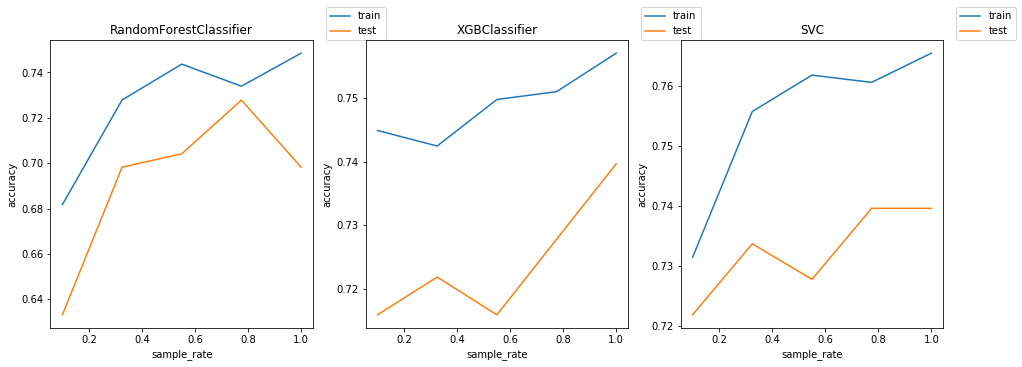

In [233]:
plt.figure(figsize=(16, 18))

i = 1
for model_name, performance in results_train.items():    
    plt.subplot(3, 3, i)
    i += 1
    
    
    plt.plot(sample_rates, performance, label = 'train')
    plt.title(model_name)
    plt.xlabel('sample_rate')
    plt.ylabel('accuracy')
    
    test_performance = results_test[model_name]
    plt.plot(sample_rates, test_performance, label = 'test')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
plt.show()

In [234]:
results_train_allsp = results_train
results_test_allsp = results_test

In [ ]:
#accumulate trainning results

In [134]:
from sklearn.utils import shuffle
from sklearn.base import BaseEstimator, RegressorMixin

class PseudoLabeler_1(BaseEstimator, RegressorMixin):
    '''
    Sci-kit learn wrapper for creating pseudo-lebeled estimators.
    '''
    
    def __init__(self, model, unlabled_data, sample_rate, seed=42):
        '''
        @sample_rate - percent of samples used as pseudo-labelled data
                       from the unlabled dataset
        '''
        #assert sample_rate <= 1.0, 'Sample_rate should be between 0.0 and 1.0.'
        self.sample_rate = sample_rate
        self.seed = seed
        self.model = model
        self.model.seed = seed
        
        self.unlabled_data = unlabled_data
        #self.features = features
        #self.target = target
        
    def get_params(self, deep=True):
        return {
            "sample_rate": self.sample_rate,
            "seed": self.seed,
            "model": self.model,
            "unlabled_data": self.unlabled_data,
            #"features": self.features,
            #""target": self.target
        }

    def set_params(self, **parameters):
        
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

        
    def fit(self, X, y, i):
        '''
        Fit the data using pseudo labeling.
        '''
        augemented_train = self.__create_augmented_train(X, y, i)
        
        
        self.model.fit(
            augemented_train[0],
            augemented_train[1]
        )
        
        return self


    def __create_augmented_train(self, X, y, i):
        '''
        Create and return the augmented_train set that consists
        of pseudo-labeled and labeled data.
        '''        
        
        num_of_samples = int(len(self.unlabled_data) * self.sample_rate)
        
        # Train the model and creat the pseudo-labels
        self.model.fit(X, y)
        pseudo_labels = self.model.predict(self.unlabled_data)
        
        # Add the pseudo-labels to the test set
        #pseudo_data = self.unlabled_data.copy()
        #pseudo_data[self.target] = pseudo_labels
        a = pseudo_labels.copy()
        b = self.unlabled_data.copy()
        #concat a & b
        c = np.c_[a.reshape(len(a), -1), b.reshape(len(b), -1)]
        
        #np.random.shuffle(c)
        #original form of features and labels
        a2 = c[:, :a.size//len(a)].reshape(a.shape)
        b2 = c[:, a.size//len(a):].reshape(b.shape)
        
        #pseudo_data = c.copy()
        # Take a subset of the test set with pseudo-labels and append in onto
        # the training set
        count = (1 // self.sample_rate)
        if i < count:
            sampled_pseudo_data = b2[(i*num_of_samples): ((i+1)*num_of_samples)]
            sampled_pseudo_label = a2[(i*num_of_samples): ((i+1)*num_of_samples)]
        else:
            sampled_pseudo_data = b2[(i*num_of_samples):]
            sampled_pseudo_label = a2[(i*num_of_samples):]
        
        #temp_train = pd.concat([X, y], axis=1)
        #augemented_train = pd.concat([sampled_pseudo_data, temp_train])
        
        return (sampled_pseudo_data,sampled_pseudo_label)
        
    def predict(self, X):
        '''
        Returns the predicted values.
        '''
        return self.model.predict(X)
    
    def get_model_name(self):
        return self.model.__class__.__name__
    
    

# tuning parameters

In [ ]:
#xgboost 

In [164]:

#set initial parameters for modelling
y_train_ndarray= y_train['manual_label'].as_matrix()
type(y_train_ndarray)
#test = unlabeledData
testdb = scaleunlabeledVecs
#features = 'vectors'
#target = y_train_ndarray
sample_rate = 0.3

In [565]:
sample_rate=0.8

In [602]:
model_xgb = PseudoLabeler_1(
    XGBClassifier(learning_rate =0.12,
 n_estimators=180,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 slient=True),
    testdb,
    #features,
    #target,
    sample_rate
)
#tuning skills link
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

initialise dataset function


In [603]:

j = (1/sample_rate)+1

#results_train = {}
#results_test = {}
results_train = []
results_test = []
for i in range(int(j)):
    model_xgboost = model_xgb.fit(scaletrainVecs,y_train_ndarray, i)
    pred_train = model_xgboost.predict(scaletrainVecs)
    pred_test = model_xgboost.predict(scaletestVecs)
    
    scores_train = accuracy_score(y_train_ndarray, pred_train)
    results_train.append(scores_train)
    scores_test = accuracy_score(y_validation, pred_test)
    results_test.append(scores_test)

fit function
create dataset function
fit function
create dataset function


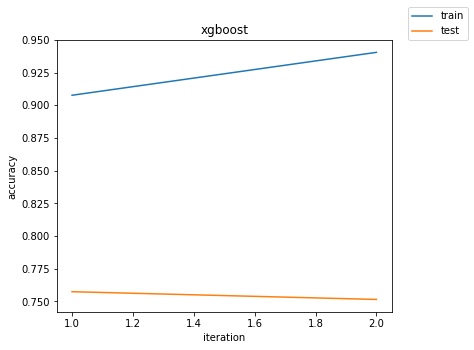

In [604]:
#plot
iteration = [1,2]
plt.figure(figsize=(6, 5))
plt.plot(iteration, results_train, label = 'train')
plt.plot(iteration, results_test, label = 'test')
plt.title('xgboost')
plt.xlabel('iteration')
plt.ylabel('accuracy')
    
    
        

plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
plt.show()


In [607]:
results_train

[0.90765492102065615, 0.9404617253948967]

In [605]:
results_test
#xgboost best result

[0.75739644970414199, 0.75147928994082835]

In [ ]:
#SVM
#tuning skills links: https://blog.csdn.net/u014484783/article/details/78220646

In [665]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid={"C":[0.1,1,2,2.5,3,4,5,10], "gamma": [0.001,0.005,0.05,0.1,0.15]}, cv=3)
grid.fit(testdb, test_p)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 0.001} with a score of 0.96


In [650]:
clf = SVC(C = C, gamma = gamma )
clf.fit(scaletrainVecs, y_train_ndarray)
z = clf.predict(scaletestVecs)
y = accuracy_score(y_validation, z)
y
# c = 3 gamma = 0.001 original train set

0.76923076923076927

In [697]:
C = grid.best_params_['C']
gamma = grid.best_params_['gamma']
# c = 10 gamma = 0.001 whole unlabeled set

0.001

In [774]:
sample_rate = 0.35
model_svc = PseudoLabeler_1(
    SVC(C = 6.8, gamma = 0.001 ),
    testdb,
    #features,
    #target,
    sample_rate
)


initialise dataset function


In [771]:
j = (1/sample_rate)+1

#results_train = {}
#results_test = {}
results_train = []
results_test = []
for i in range(int(j)):
    model_svc = model_svc.fit(scaletrainVecs,y_train_ndarray, i)
    pred_train = model_svc.predict(scaletrainVecs)
    pred_test = model_svc.predict(scaletestVecs)
    
    scores_train = accuracy_score(y_train_ndarray, pred_train)
    results_train.append(scores_train)
    scores_test = accuracy_score(y_validation, pred_test)
    results_test.append(scores_test)

fit function
create dataset function
fit function
create dataset function


In [763]:
print('results_test:', results_test) #c=2 gamma=0.001 smaple_rate = 0.8

results_test: [0.76331360946745563, 0.74556213017751483]


In [745]:
#
print('results_test:', results_test) #c=6.8 gamma=0.001 smaple_rate = 0.35

results_test: [0.7751479289940828, 0.75739644970414199, 0.72189349112426038]


In [727]:
#####The best accuracy results!
#print('results_train:', results_train) c=6.8 gamma=0.001 smaple_rate = 0.3
print('results_test:', results_test)

results_test: [0.75739644970414199, 0.7751479289940828, 0.74556213017751483, 0.7100591715976331]


In [730]:
print('results_test:', results_test) #c=7 gamma=0.001 smaple_rate = 0.3

results_test: [0.76331360946745563, 0.76923076923076927, 0.73964497041420119, 0.7100591715976331]


In [772]:
print('results_test:', results_test) #c=8 gamma=0.001 smaple_rate = 0.8

results_test: [0.74556213017751483, 0.72189349112426038]


In [751]:
print('results_test:', results_test) #c=5 gamma=0.001 smaple_rate = 0.8

results_test: [0.76331360946745563, 0.73372781065088755]


In [ ]:
#lstm_full_unlabeled data

In [442]:
unlabelvecs_lstm = testdb.copy()
scaleunlabelVecs_lstm = np.reshape(unlabelvecs_lstm, (unlabelvecs_lstm.shape[0], 1, unlabelvecs_lstm.shape[1]))

In [521]:
classes = model.predict(scaleunlabelVecs_lstm)

#acc = np_utils.accuracy(classes, yt)
#print('Test accuracy:', acc)

In [504]:
classes[0]

array([-0.72902286], dtype=float32)

In [522]:
for i in range(len(classes)):
    if classes[i] < 0:
        classes[i] = -1
    else:
        classes[i] = 1
        

In [612]:
model.fit(scaleunlabelVecs_lstm, classes, epochs=5, batch_size=150
          ,validation_data=(scaletestVecs_lstm,y_validation.values),verbose=1)
scores = model.evaluate(scaletestVecs_lstm, y_validation.values, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 7253 samples, validate on 169 samples
Epoch 1/5
7253/7253 [==============================] - 8s 1ms/step - loss: -6.7994 - acc: 0.9029 - val_loss: 0.3061 - val_acc: 0.6036
Epoch 2/5
7253/7253 [==============================] - 8s 1ms/step - loss: -6.8495 - acc: 0.9054 - val_loss: -0.3129 - val_acc: 0.6509
Epoch 3/5
7253/7253 [==============================] - 8s 1ms/step - loss: -7.0188 - acc: 0.9159 - val_loss: 0.3317 - val_acc: 0.6272
Epoch 4/5
7253/7253 [==============================] - 8s 1ms/step - loss: -6.8447 - acc: 0.9158 - val_loss: -0.0174 - val_acc: 0.6568
Epoch 5/5
169/169 [==============================] - 0s 670us/step
Accuracy: 65.09%


In [ ]:
#overfitting??????

# sample_rate = 0.3

In [237]:
sample_rate =0.3
def pseudo_label_wrapper_1(model):
    return PseudoLabeler_1(model, testdb, sample_rate =0.3)

# List of all models to test
model_factory = [
    RandomForestClassifier( n_estimators = 100 ),
    XGBClassifier(),
    SVC()
    
]

# Apply the PseudoLabeler class to each model
model_factory = map(pseudo_label_wrapper_1, model_factory)

# Train each model with different sample rates
results_train = {}
results_test = {}

for model in model_factory:
    model_name = model.get_model_name()
    print('%s' % model_name)

    results_train[model_name] = list()
    results_test[model_name] = list()
    # Calculate the CV-3 R2 score and store it
    j = (1/sample_rate)+1
    #j = 4
    for i in range(int(j)):
        model = model.fit(scaletrainVecs,y_train_ndarray, i)
        pred_train = model.predict(scaletrainVecs)
        pred_test = model.predict(scaletestVecs)
        scores_train = accuracy_score(y_train_ndarray, pred_train)
        results_train[model_name].append(scores_train)
        
        scores_test = accuracy_score(y_validation, pred_test)
        results_test[model_name].append(scores_test)

initialise dataset function
RandomForestClassifier
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
initialise dataset function
XGBClassifier
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
initialise dataset function
SVC
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function


In [238]:
results_train_sp3 = results_train
results_test_sp3 = results_test 

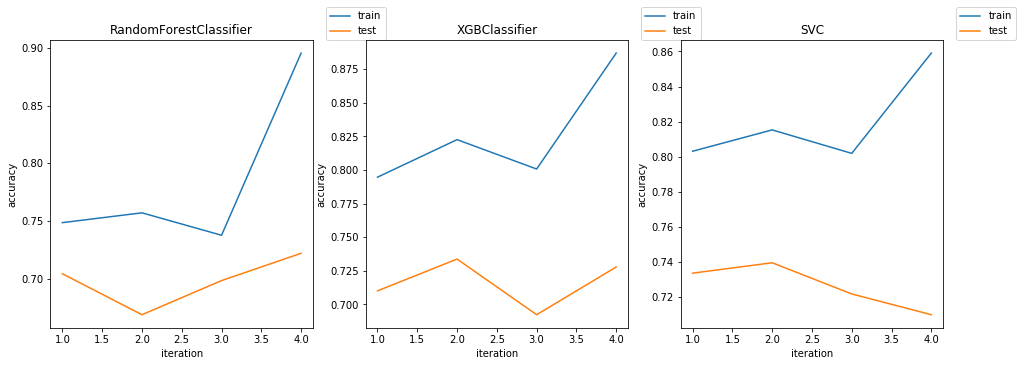

In [239]:

plt.figure(figsize=(16, 18))

i = 1
iteration = [1,2,3,4]
for model_name, performance in results_train.items():    
    plt.subplot(3, 3, i)
    i += 1
    
    
    plt.plot(iteration, performance, label = 'train')
    plt.title(model_name)
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    
    test_performance = results_test[model_name]
    plt.plot(iteration, test_performance, label = 'test')
    

    plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
plt.show()

# sample_rate = 0.1

In [240]:
sample_rate =0.1

In [244]:
def pseudo_label_wrapper_1(model):
    return PseudoLabeler_1(model, testdb, sample_rate =0.1)

# List of all models to test
model_factory = [
    RandomForestClassifier( n_estimators = 100 ),
    XGBClassifier(),
    SVC()
]

# Apply the PseudoLabeler class to each model
model_factory = map(pseudo_label_wrapper_1, model_factory)

# Train each model with different sample rates
results_train = {}
results_test = {}

for model in model_factory:
    model_name = model.get_model_name()
    print('%s' % model_name)

    results_train[model_name] = list()
    results_test[model_name] = list()
    # Calculate the CV-3 R2 score and store it
    j = (1/sample_rate)
    #j = 4
    for i in range(int(j)):
        model = model.fit(scaletrainVecs,y_train_ndarray, i)
        pred_train = model.predict(scaletrainVecs)
        pred_test = model.predict(scaletestVecs)
        scores_train = accuracy_score(y_train_ndarray, pred_train)
        results_train[model_name].append(scores_train)
        
        scores_test = accuracy_score(y_validation, pred_test)
        results_test[model_name].append(scores_test)

initialise dataset function
RandomForestClassifier
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
initialise dataset function
XGBClassifier
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
initialise dataset function
SVC
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create data

In [245]:
results_train_sp1 = results_train
results_test_sp1 = results_test 

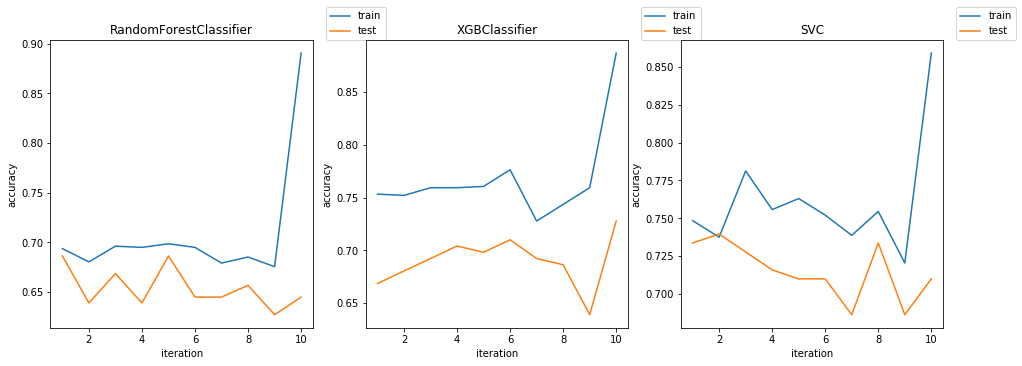

In [247]:
plt.figure(figsize=(16, 18))

i = 1
iteration = [1,2,3,4,5,6,7,8,9,10]
for model_name, performance in results_train.items():    
    plt.subplot(3, 3, i)
    i += 1
    
    
    plt.plot(iteration, performance, label = 'train')
    plt.title(model_name)
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    
    test_performance = results_test[model_name]
    plt.plot(iteration, test_performance, label = 'test')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
plt.show()

# sample_rate = 0.8

In [204]:
sample_rate =0.8

In [205]:
def pseudo_label_wrapper_1(model):
    return PseudoLabeler_1(model, testdb, sample_rate =0.8)

# List of all models to test
model_factory = [
    RandomForestClassifier( n_estimators = 100 ),
    XGBClassifier(),
    SVC()
]

# Apply the PseudoLabeler class to each model
model_factory = map(pseudo_label_wrapper_1, model_factory)

# Train each model with different sample rates
results_train = {}
results_test = {}

for model in model_factory:
    model_name = model.get_model_name()
    print('%s' % model_name)

    results_train[model_name] = list()
    results_test[model_name] = list()
    # Calculate the CV-3 R2 score and store it
    j = (1/sample_rate)+1
    #j = 4
    for i in range(int(j)):
        model = model.fit(scaletrainVecs,y_train_ndarray, i)
        pred_train = model.predict(scaletrainVecs)
        pred_test = model.predict(scaletestVecs)
        scores_train = accuracy_score(y_train_ndarray, pred_train)
        results_train[model_name].append(scores_train)
        
        scores_test = accuracy_score(y_validation, pred_test)
        results_test[model_name].append(scores_test)

initialise dataset function
RandomForestClassifier
fit function
create dataset function
fit function
create dataset function
initialise dataset function
XGBClassifier
fit function
create dataset function
fit function
create dataset function
initialise dataset function
SVC
fit function
create dataset function
fit function
create dataset function


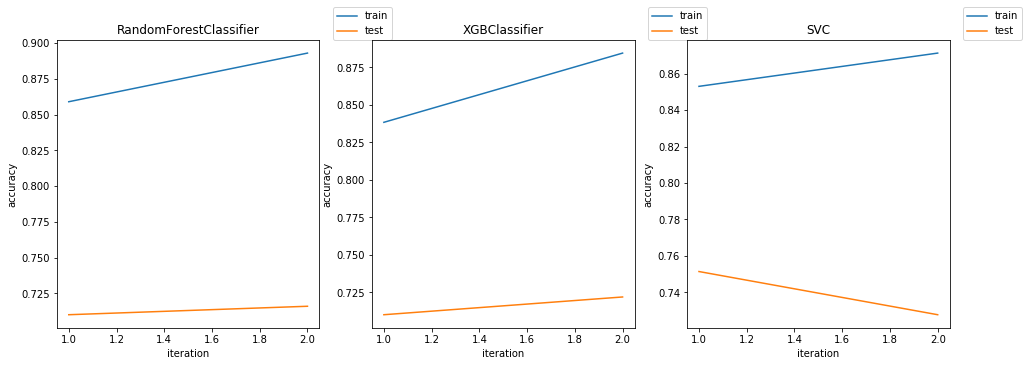

In [230]:
plt.figure(figsize=(16, 18))

i = 1
iteration = [1,2]
for model_name, performance in results_train.items():    
    plt.subplot(3, 3, i)
    i += 1
    
    
    plt.plot(iteration, performance, label = 'train')
    plt.title(model_name)
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    
    test_performance = results_test[model_name]
    
    plt.plot(iteration, test_performance, label = 'test')
    

    plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
plt.show()

# Final labelling model

In [777]:
#SVC
sample_rate = 0.3
model_svc = PseudoLabeler_1(
    SVC(C = 6.8, gamma = 0.001 ),
    testdb,
    #features,
    #target,
    sample_rate
)

initialise dataset function


In [778]:
j = (1/sample_rate)+1

#results_train = {}
#results_test = {}
results_train = []
results_test = []
for i in range(int(j)):
    model_svc = model_svc.fit(scaletrainVecs,y_train_ndarray, i)
    pred_train = model_svc.predict(scaletrainVecs)
    pred_test = model_svc.predict(scaletestVecs)
    
    scores_train = accuracy_score(y_train_ndarray, pred_train)
    results_train.append(scores_train)
    scores_test = accuracy_score(y_validation, pred_test)
    results_test.append(scores_test)

fit function
create dataset function
fit function
create dataset function
fit function
create dataset function
fit function
create dataset function


In [779]:
# c=6.8 gamma=0.001 smaple_rate = 0.3
print('results_train:', results_train)
print('results_test:', results_test)

results_train: [0.85176184690157963, 0.8651275820170109, 0.86269744835965978, 0.89064398541919809]
results_test: [0.75739644970414199, 0.7751479289940828, 0.74556213017751483, 0.7100591715976331]


In [ ]:
j = 2
for i in range(int(j)):
    model_svc = model_svc.fit(scaletrainVecs,y_train_ndarray, i)
    
pred_all = model_svc.predict(scaletestVecs)

In [792]:
df_all = pd.read_csv("bof_db_17_8.csv", sep=',')

In [793]:
df_all.head()

,Unnamed: 0,id,summary,title,article_date,is_exclusive,total_comments,pageviews,facebook_likes,linkedin_shares,tags,sub_content,content,content_score,summary_score,sum_score,label
0,0,741663,the luxury group's controlling family sold sha...,Ferragamo Shares Tumble After Family Trims Stake,2018-06-20 10:03:44,False,0,985,35,0,salvatoreferragamo,"florence, italy -- shares in salvatoreferraga...","florence, italy -- shares in salvatoreferraga...",-0.052900,0.000000,-0.037030,-1.0
1,1,740019,"with its biggest ever french store, set to ope...",How H&M Is Rethinking Its Flagships,2018-06-19 05:25:29,True,0,11153,112,0,hm,"paris, france -- in the speedy world of fast ...","paris, france -- in the speedy world of fast ...",0.139067,0.084091,0.122574,1.0
2,2,736070,the spanish company is developing new technolo...,Zara Looks to Technology to Keep up With Faste...,2018-06-15 07:00:00,False,0,5217,307,0,zara,"madrid, spain -- the pioneer of fast fashion ...","madrid, spain -- the pioneer of fast fashion ...",0.122035,0.045455,0.099061,1.0
3,3,735362,the conglomerate's e-commerce retailer 24sevre...,LVMH Targets Growing Jewellery Sales with Onli...,2018-06-14 12:58:43,False,0,1907,9,0,lvmh,"paris, france -- lvmh, the french group behin...","paris, france -- lvmh, the french group behin...",0.071508,0.208333,0.112556,1.0
4,4,734604,maier transformed the 'stealth wealth' label ...,"As Tomas Maier Departs, What's Next for Botteg...",2018-06-13 17:44:46,False,1,26809,1449,0,tomasmaier,"milan, italy -- bottegaveneta creative direct...","milan, italy -- bottegaveneta creative direct...",0.091333,-0.054545,0.047569,1.0


In [794]:
df_all = df_all.drop(['Unnamed: 0'], axis=1)

In [795]:
clean_alldb_contents = []
for content in df_all["sub_content"]:
    clean_alldb_contents.append( content_to_wordlist( content, 
        remove_stopwords=True ))

alldbDataVecs = getAvgFeatureVecs( clean_alldb_contents, model_1, 300)

content 0 of 6561
content 1000 of 6561
content 2000 of 6561
content 3000 of 6561
content 4000 of 6561
content 5000 of 6561
content 6000 of 6561


In [796]:
scalealldbVecs = scale(alldbDataVecs)

/Users/bonnieliu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/bonnieliu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [797]:
#save ndarray
np.save("alldbDataVecs.npy",alldbDataVecs)
b00 = np.load("alldbDataVecs.npy")
np.save("scalealldbVecs.npy",scalealldbVecs)
b11 = np.load("scalealldbVecs.npy")

In [799]:
pred_all = model_svc.predict(scalealldbVecs)

In [802]:
#save prediction with label
output = df_all.copy()
output['semi_label'] = pred_all
output.to_csv( "semi_svc78%_prediction.csv", index=False )

In [807]:
output['semi_label'].value_counts()

 1.0    4235
-1.0    2326
Name: semi_label, dtype: int64